# Dimension Reduction

- dimension of data is the number of variables
- reduction results in efficiency


Approaches:
- remove or combine categories
- converting categorical variables into numerical variables
- employing automated reduction technique such as PCA


In [1]:
import matplotlib.pylab as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

from pandas_util import load_boston_housing

In [2]:
df = load_boston_housing()
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_medv
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,12.67,22.6,0
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0,0
252,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330,19.1,3.53,29.6,0
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,5.12,50.0,1
459,6.80117,0.0,18.10,0,0.713,6.081,84.4,2.7175,24,666,20.2,14.70,20.0,0


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   chas      506 non-null    int64  
 4   nox       506 non-null    float64
 5   rm        506 non-null    float64
 6   age       506 non-null    float64
 7   dis       506 non-null    float64
 8   rad       506 non-null    int64  
 9   tax       506 non-null    int64  
 10  ptratio   506 non-null    float64
 11  lstat     506 non-null    float64
 12  medv      506 non-null    float64
 13  cat_medv  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [5]:
# To view CRIM stats
df.describe().crim

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [6]:
print("Number of missing values:", df.crim.isnull().sum())

Number of missing values: 0


In [7]:
# To understand the relationship between two or more numerica variables, we can plot the complete matrix of correlations.
df.corr().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


In [8]:
# Aggregation and Pivot Tables
df.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

In [9]:
# Average MEDV by CHAS and RM
# By default, the method creates a categorical variable range, e.g. (6,7].
# The argument `labels=False` determines integer instead, e.g. 6
df["rm_bin"] = pd.cut(df.rm, range(0, 10), labels=False)

In [10]:
df.groupby(["rm_bin", "chas"]).medv.mean()

rm_bin  chas
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: medv, dtype: float64

In [11]:
# Pivot tables

pd.pivot_table(
    df, values="medv", index=["rm_bin"], columns=["chas"], aggfunc=np.mean, margins=True
)

chas,0,1,All
rm_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


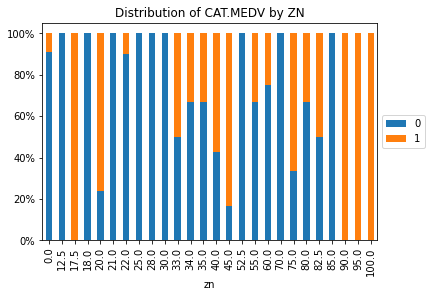

In [12]:
# Use method crosstab to create a cross-tabulation of two variables.
tbl = pd.crosstab(df.cat_medv, df.zn)

# Convert number to ratios.
prop_tbl = tbl / tbl.sum()
prop_tbl.round(2)

# Plot the ratios in a stacked bar chart.
ax = prop_tbl.T.plot.bar(stacked=True)

# UserWarning: FixedFormatter should only be used together with FixedLocator
# ax.set_yticklabels([":,.0%".format(x) for x in ax.get_yticks()])
label_format = "{:,.0%}"  # Display as percent, so 0.1 becomes 10%
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format.format(x) for x in ticks_loc])


plt.title("Distribution of CAT.MEDV by ZN")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [13]:
cereals_df = pd.read_csv("./datasets/dmba/Cereals.csv")
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [14]:
pca = PCA(n_components=2)
pca.fit(cereals_df[["calories", "rating"]])
pca_summary = pd.DataFrame(
    {
        "Standard deviation": np.sqrt(pca.explained_variance_),
        "Proportion of variance": pca.explained_variance_ratio_,
        "Cumulative proportion": np.cumsum(pca.explained_variance_ratio_),
    }
)

pca_summary = pca_summary.T
pca_summary.columns = ["PC1", "PC2"]
pca_summary.round(4)
pca_components_df = pd.DataFrame(
    pca.components_.T, columns=["PC1", "PC2"], index=["calories", "rating"]
)
pca_components_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


In [15]:
scores = pd.DataFrame(
    pca.transform(cereals_df[["calories", "rating"]]), columns=["PC1", "PC2"]
)
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686
